<a href="https://colab.research.google.com/github/lusekelok/diveintocode-ml/blob/master/Credit%20Information%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#[Problem 1] Understanding the content of the competition




#What kind of company is Home Credit?
Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

#What is expected in this competition?
Home Credit uses various statistical and machine learning methods to make these predictions, hence the competition expects Kagglers to help Home Credit to unlock the full potential of their data.

#What are the benefits companies can gain by predicting this?
Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful. And also this will help protect lenders against risks of lending to clients who are incapable of repayment.

In [23]:
#[Problem 2] Understanding the overview of data

from plotly.offline import *
from wordcloud import WordCloud
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly as py
from plotly import tools
from datetime import date
import pandas as pd
import numpy as np 
import seaborn as sns
import random 
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)


In [24]:

HomeCredit_columns_description= pd.read_csv("/content/sample_data/HomeCredit_columns_description.csv", encoding = 'unicode_escape')

print(dir(HomeCredit_columns_description))
HomeCredit_columns_description.head()

['Description', 'Row', 'Special', 'T', 'Table', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_TO_AXIS_NUMBER', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [25]:
application_train=pd.read_csv("/content/sample_data/application_train.csv")

print(dir(application_train))
application_train.head()

['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'CODE_GENDER', 'COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'EMERGENCYSTATE_MODE', 'ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_EMAIL', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_PHONE', 'FLAG_WORK_PHONE', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE', 'FONDKAPREMONT_MODE', 'HOUR_APPR_PROCESS_START', 'HOUSETYPE_M

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,MONDAY,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,Laborers,2.0,2.0,2.0,WEDNESDAY,17.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,Core staff,1.0,2.0,2.0,THURSDAY,11.0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
print(HomeCredit_columns_description.info())
print(application_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   219 non-null    int64 
 1   Table        219 non-null    object
 2   Row          219 non-null    object
 3   Description  219 non-null    object
 4   Special      86 non-null     object
dtypes: int64(1), object(4)
memory usage: 8.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13574 entries, 0 to 13573
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(103), int64(3), object(16)
memory usage: 12.6+ MB
None


In [27]:
print(HomeCredit_columns_description.describe())
print(application_train.describe())

       Unnamed: 0
count  219.000000
mean   111.981735
std     63.395726
min      1.000000
25%     57.500000
50%    112.000000
75%    166.500000
max    221.000000
          SK_ID_CURR  ...  AMT_REQ_CREDIT_BUREAU_YEAR
count   13574.000000  ...                11730.000000
mean   107911.944011  ...                    1.877835
std      4562.181670  ...                    1.847127
min    100002.000000  ...                    0.000000
25%    103961.250000  ...                    0.000000
50%    107916.500000  ...                    1.000000
75%    111852.750000  ...                    3.000000
max    115817.000000  ...                   16.000000

[8 rows x 106 columns]


In [28]:
#Check if there is a missing value in the feature quantity

print(HomeCredit_columns_description.isna().sum())
print(application_train.isna().sum())

Unnamed: 0       0
Table            0
Row              0
Description      0
Special        133
dtype: int64
SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     1844
AMT_REQ_CREDIT_BUREAU_WEEK    1844
AMT_REQ_CREDIT_BUREAU_MON     1844
AMT_REQ_CREDIT_BUREAU_QRT     1844
AMT_REQ_CREDIT_BUREAU_YEAR    1844
Length: 122, dtype: int64


In [29]:
x = application_train["TARGET"].value_counts()  #total count of both paid and unpaid clients
print(x)

0    12528
1     1046
Name: TARGET, dtype: int64


In [30]:
yy = x.index[::-1]
print(yy)
xx = x.values[::-1]
print(xx) 

Int64Index([1, 0], dtype='int64')
[ 1046 12528]


In [31]:
trace = go.Bar(y=yy, x=xx, orientation = 'h', marker=dict(color="red"))
data = [trace]
layout = dict(title="here we are", margin=dict(l=200), width=600, height=360)
fig = go.Figure(data=data, layout=layout)
iplot(fig)  #the horizontal  bar graph is plotted and saved as "temp-plot.html"

In [32]:
#[Problem 3] Defining issues



Issues/ question
1. how many clients had trouble paying the loan and also how many of them paid without any trouble?
2. what ratio of the client were female and males, this also applies to the ratio of " not having trouble paying" and " having trouble paying" clients?
3. How do the different marriage statuses compare with regards to paying the loan?
4. What number of clients own real estate and own cars?

Int64Index([1, 0], dtype='int64')
[ 1046 12528]


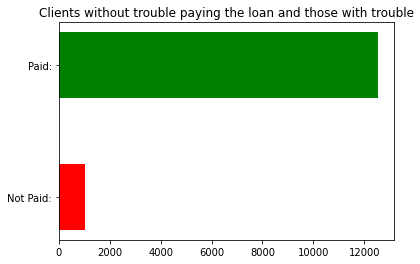

In [33]:
#[Problem 4] Data exploration

#1 from the analysis of the data, it has been shown that 24825 of the clients had trouble paying back the loan while 282686 clients did not have trouble paying back
yy = x.index[::-1]
print(yy)
TAR = x.values[::-1]
print(TAR)
#horizontal bar below
y1 = ["Not Paid:", "Paid:"]
w = [TAR[0], TAR[1]]
c = ["red", "green"]
plt.barh(y1, w, 0.5, color=c)
#plt.xlabel("")
#plt.ylabel()
plt.title("Clients without trouble paying the loan and those with trouble")
plt.show()

In [34]:
#2. 
CG = application_train["CODE_GENDER"].value_counts()  #count of each gender
print(CG) 

F    8912
M    4662
Name: CODE_GENDER, dtype: int64


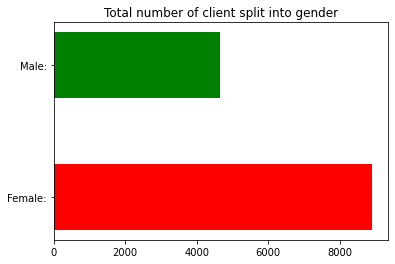

In [35]:
y1 = ["Female:", "Male:"]
w = [CG[0], CG[1]]
c = ["red", "green"]
plt.barh(y1, w, 0.5, color=c)
#plt.xlabel("")
#plt.ylabel()
plt.title("Total number of client split into gender")
plt.show()

In [36]:
Paid = application_train.loc[(application_train["TARGET"]==0)]  #all paid clients
print(Paid)

       SK_ID_CURR  ...  AMT_REQ_CREDIT_BUREAU_YEAR
1          100003  ...                         0.0
2          100004  ...                         0.0
3          100006  ...                         NaN
4          100007  ...                         0.0
5          100008  ...                         1.0
...           ...  ...                         ...
13569      115813  ...                         0.0
13570      115814  ...                         0.0
13571      115815  ...                         1.0
13572      115816  ...                         NaN
13573      115817  ...                         NaN

[12528 rows x 122 columns]


In [37]:
paid_Gsplit = Paid["CODE_GENDER"].value_counts()  #count of all paid by gender
print(paid_Gsplit)

F    8320
M    4208
Name: CODE_GENDER, dtype: int64


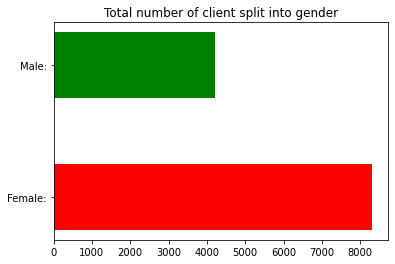

In [38]:
y1 = ["Female:", "Male:"]
w = [paid_Gsplit[0], paid_Gsplit[1]]
c = ["red", "green"]
plt.barh(y1, w, 0.5, color=c)
#plt.xlabel("")
#plt.ylabel()
plt.title("Total number of client split into gender")
plt.show()

In [39]:
numrec = application_train["NAME_FAMILY_STATUS"].value_counts()  #number of clients own real estate and own cars?
print(numrec)

Married                 8800
Single / not married    1964
Civil marriage          1298
Separated                821
Widow                    690
Name: NAME_FAMILY_STATUS, dtype: int64


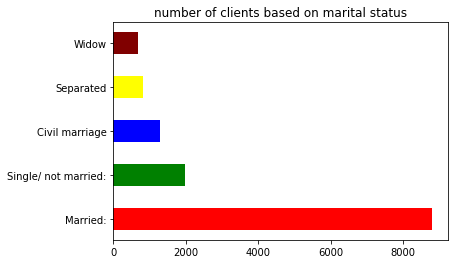

In [41]:
y1 = ["Married:", "Single/ not married:", "Civil marriage", "Separated", "Widow"]
w = [numrec[0], numrec[1], numrec[2], numrec[3], numrec[4]]
c = ["red", "green", "blue", "yellow", "maroon", "black"]
plt.barh(y1, w, 0.5, color=c)
#plt.xlabel("")
#plt.ylabel()
plt.title("number of clients based on marital status")
plt.show()

In [42]:
paid_marital = Paid["NAME_FAMILY_STATUS"].value_counts()  #count of all paid by gender
print(paid_marital)

Married                 8165
Single / not married    1779
Civil marriage          1180
Separated                751
Widow                    652
Name: NAME_FAMILY_STATUS, dtype: int64


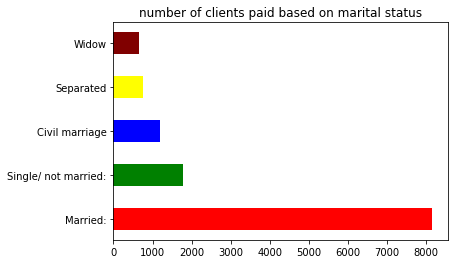

In [44]:
y2 = ["Married:", "Single/ not married:", "Civil marriage", "Separated", "Widow"]
w = [paid_marital[0], paid_marital[1], paid_marital[2], paid_marital[3], paid_marital[4]]
c = ["red", "green", "blue", "yellow", "maroon", "black"]
plt.barh(y2, w, 0.5, color=c)
#plt.xlabel("")
#plt.ylabel()
plt.title("number of clients paid based on marital status")
plt.show()

In [45]:
Unpaid = application_train.loc[(application_train["TARGET"]==1)]  #all unpaid clients
print(Unpaid)

       SK_ID_CURR  ...  AMT_REQ_CREDIT_BUREAU_YEAR
0          100002  ...                         1.0
26         100031  ...                         2.0
40         100047  ...                         4.0
42         100049  ...                         2.0
81         100096  ...                         0.0
...           ...  ...                         ...
13519      115754  ...                         0.0
13526      115762  ...                         3.0
13530      115766  ...                         5.0
13535      115771  ...                         0.0
13538      115775  ...                         2.0

[1046 rows x 122 columns]


In [50]:
unpaid_marital = Unpaid["NAME_FAMILY_STATUS"].value_counts()  #count of all paid by gender
print(unpaid_marital)

Married                 635
Single / not married    185
Civil marriage          118
Separated                70
Widow                    38
Name: NAME_FAMILY_STATUS, dtype: int64


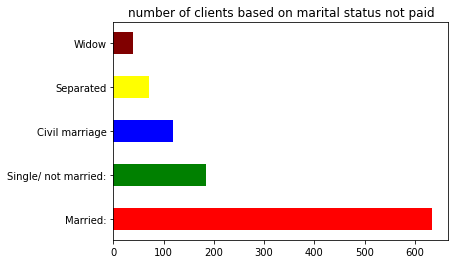

In [52]:
y1 = ["Married:", "Single/ not married:", "Civil marriage", "Separated", "Widow"] #count of all unpaid by marital status
w = [unpaid_marital[0], unpaid_marital[1], unpaid_marital[2], unpaid_marital[3], unpaid_marital[4]]
c = ["red", "green", "blue", "yellow", "maroon"]
plt.barh(y1, w, 0.5, color=c)
#plt.xlabel("")
#plt.ylabel()
plt.title("number of clients based on marital status not paid")
plt.show()

Index(['Y', 'N'], dtype='object')
[9478 4096]


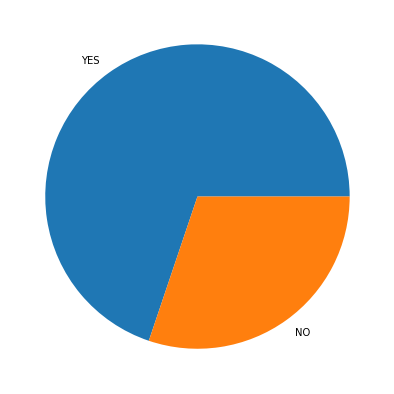

In [48]:
#number of clients own real estate
t = application_train['FLAG_OWN_REALTY'].value_counts()
labels = t.index
values = t.values
print(labels)
print(values)

colors = ['#96D38C','#FEBFB3']
# Creating dataset
cars = ['YES', 'NO']
  
data = [values[0], values[1]]
  
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = cars)
  
# show plot
plt.show()


Index(['N', 'Y'], dtype='object')
[8991 4583]


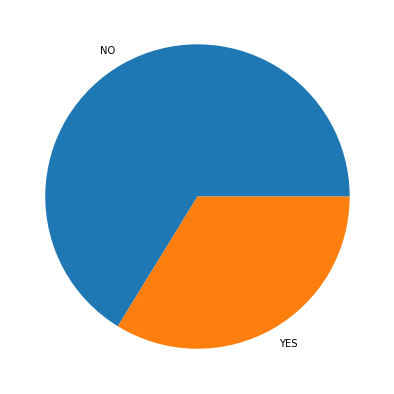

In [49]:
t = application_train['FLAG_OWN_CAR'].value_counts()
labels = t.index
values = t.values
print(labels)
print(values)

colors = ['#96D38C','#FEBFB3']
# Creating dataset
cars = ['NO', 'YES']
  
data = [values[0], values[1]]
  
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = cars)
  
# show plot
plt.show()

About 70% of the applicants own Real Estate, while only 34% of applicants own Car who had applied for the loan in the past years. However, a higher percentage of people having payment difficulties was observed with applicants which did not owned Car or which did not owned Real Estate